In [2]:
from nilearn import image

# Load power template coords

powerfile = '/home/anton/Documents/Tulane/Hackathon/power264/power264MNI.nii.gz'

powerimg = image.load_img(powerfile)

print(powerimg.shape)

(91, 109, 91)


In [4]:
import numpy as np

# Load ROI coordinates

import re

# Radius 5
pat = re.compile('.*Power(\d+)([^#]+)#(-?\d+,-?\d+,-?\d+).*')

def parseLine(pat, line):
    res = pat.search(line)
    if res:
        idx, bfn, mni = res.groups()
        mni = np.array([int(coord) for coord in mni.split(',')]+[1])
        return (idx,bfn,mni)
    return None

roifile = '/home/anton/Documents/Tulane/Hackathon/power264/power264CoorMNI.sclib'
rois = []

with open(roifile, 'r') as f:
    for line in f.readlines():
        p = parseLine(pat, line)
        rois.append(p)

rois = [p for p in rois if p is not None]
print(len(rois))

264


In [117]:
import pickle

def getRoiImage(img, powerimg, tp):
    vol = image.index_img(img, tp)
    vol_resamp = image.resample_to_img(vol, powerimg)
    vol_rois = image.math_img('(img1 > 0)*img2', img1=powerimg, img2=vol_resamp)
    return vol_rois
    
def extractSignal(volRoiImg, rois, invXfrom):
    signal = np.zeros(len(rois))

    for i,roi in enumerate(rois):
        x,y,z,_ = np.floor(invaff@roi[-1]).astype('int')
        signal[i] = np.sum(volRoiImg.get_fdata()[x-2:x+2,y-2:y+2,z-2:z+2])
        
    return signal

signalAllSubj = []

for i in range(2,78):
    num = f'00{i}' if i < 10 else f'0{i}'
    subdir = f'/home/anton/Documents/Tulane/Hackathon/ds004144-out/sub-{num}/func'
    imgname = f'sub-{num}_task-epr_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
    img = None
    
    try:
        img = image.load_img(f'{subdir}/{imgname}')
    except:
        continue
    
    signal = np.zeros((264,img.shape[-1]))
    invaff = np.linalg.inv(powerimg.affine)

    for tp in range(img.shape[-1]):
        volImg = getRoiImage(img, powerimg, tp)
        signal[:,tp] = extractSignal(volImg, rois, invaff)
        if tp%100 == 0:
            print(f'Completed tp {tp}')
            
    outfile = f'/home/anton/Documents/Tulane/Hackathon/ImageNomeR/data/fmri-ts-epr/sub-{num}.pkl'
    with open(outfile, 'wb') as f:
        pickle.dump(signal, f)
            
    signalAllSubj.append(signal)
    print(f'Completed {i}')        

signalAllSubj = np.stack(signalAllSubj)
print(signalAllSubj.shape)
print('Done')

Completed tp 0
Completed tp 100
Completed tp 200
Completed tp 300
Completed tp 400
Completed tp 500
Completed tp 600
Completed tp 700
Completed 2
Completed tp 0
Completed tp 100
Completed tp 200
Completed tp 300
Completed tp 400
Completed tp 500
Completed tp 600
Completed tp 700
Completed tp 800
Completed tp 900
Completed tp 1000
Completed 3
Completed tp 0
Completed tp 100
Completed tp 200
Completed tp 300
Completed tp 400
Completed tp 500
Completed tp 600
Completed tp 700
Completed 4
Completed tp 0
Completed tp 100
Completed tp 200
Completed tp 300
Completed tp 400
Completed tp 500
Completed tp 600
Completed tp 700
Completed 6
Completed tp 0
Completed tp 100
Completed tp 200
Completed tp 300
Completed tp 400
Completed tp 500
Completed tp 600
Completed tp 700
Completed 7
Completed tp 0
Completed tp 100
Completed tp 200
Completed tp 300
Completed tp 400
Completed tp 500
Completed tp 600
Completed tp 700
Completed 8
Completed tp 0
Completed tp 100
Completed tp 200
Completed tp 300
Comple

Completed tp 400
Completed tp 500
Completed tp 600
Completed tp 700
Completed tp 800
Completed 58
Completed tp 0
Completed tp 100
Completed tp 200
Completed tp 300
Completed tp 400
Completed tp 500
Completed tp 600
Completed tp 700
Completed tp 800
Completed 59
Completed tp 0
Completed tp 100
Completed tp 200
Completed tp 300
Completed tp 400
Completed tp 500
Completed tp 600
Completed tp 700
Completed tp 800
Completed 60
Completed tp 0
Completed tp 100
Completed tp 200
Completed tp 300
Completed tp 400
Completed tp 500
Completed tp 600
Completed tp 700
Completed tp 800
Completed 61
Completed tp 0
Completed tp 100
Completed tp 200
Completed tp 300
Completed tp 400
Completed tp 500
Completed tp 600
Completed tp 700
Completed tp 800
Completed 62
Completed tp 0
Completed tp 100
Completed tp 200
Completed tp 300
Completed tp 400
Completed tp 500
Completed tp 600
Completed tp 700
Completed tp 800
Completed 63
Completed tp 0
Completed tp 100
Completed tp 200
Completed tp 300
Completed tp 400

ValueError: all input arrays must have the same shape

In [119]:
signalAllSubj = []
count = 0
subjNum2IdxMap = {}
subjIdx2NumMap = {}

for i in range(2,78):
    num = f'00{i}' if i < 10 else f'0{i}'
    try:
        infile = f'/home/anton/Documents/Tulane/Hackathon/ImageNomeR/data/fmri-ts-epr/sub-{num}.pkl'
        with open(infile, 'rb') as f:
            signal = pickle.load(f)
            signalAllSubj.append(signal)
            subjNum2IdxMap[num] = count
            subjIdx2NumMap[count] = num
            count += 1
    except:
        print(f'No subject {i}')
        
signalAllSubj = np.stack(signalAllSubj)
print(signalAllSubj.shape)

No subject 5
No subject 27
No subject 35
No subject 41
No subject 51
No subject 57
No subject 65
No subject 67
No subject 71


ValueError: all input arrays must have the same shape

In [75]:
print(subjNum2IdxMap)
print(subjIdx2NumMap)

{'002': 0, '003': 1, '004': 2, '005': 3, '006': 4, '007': 5, '008': 6, '009': 7, '010': 8, '011': 9, '012': 10, '013': 11, '014': 12, '015': 13, '016': 14, '017': 15, '018': 16, '019': 17, '020': 18, '021': 19, '022': 20, '023': 21, '024': 22, '025': 23, '026': 24, '028': 25, '029': 26, '030': 27, '031': 28, '032': 29, '033': 30, '034': 31, '036': 32, '037': 33, '038': 34, '039': 35, '040': 36, '042': 37, '043': 38, '044': 39, '045': 40, '046': 41, '047': 42, '048': 43, '049': 44, '050': 45, '052': 46, '053': 47, '054': 48, '055': 49, '056': 50, '058': 51, '059': 52, '060': 53, '061': 54, '062': 55, '063': 56, '064': 57, '066': 58, '068': 59, '069': 60, '070': 61, '072': 62, '073': 63, '074': 64, '075': 65, '076': 66, '077': 67}
{0: '002', 1: '003', 2: '004', 3: '005', 4: '006', 5: '007', 6: '008', 7: '009', 8: '010', 9: '011', 10: '012', 11: '013', 12: '014', 13: '015', 14: '016', 15: '017', 16: '018', 17: '019', 18: '020', 19: '021', 20: '022', 21: '023', 22: '024', 23: '025', 24: '0

In [97]:
from scipy import signal

def butter_bandpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='band', analog=False)
    return b, a

def butter_bandpass_filter(data, cutoff, fs, order=5):
    b, a = butter_bandpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

filtSignal = butter_bandpass_filter(signalAllSubj, 
                                    np.array([10,3/4*img.shape[-1]]), 
                                    img.shape[-1]*(2.1))
print(filtSignal.shape)

(68, 264, 300)


In [98]:
pSubj = []

for i in range(filtSignal.shape[0]):
    p = np.corrcoef(filtSignal[i])
    pSubj.append(p)
    
pSubj = np.stack(pSubj)

print(pSubj.shape)

(68, 264, 264)


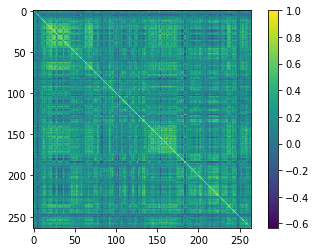

In [99]:
import matplotlib.pyplot as plt

plt.imshow(pSubj[67])
plt.colorbar()
plt.show()

In [115]:
a,b = np.triu_indices(264,1)
idcs = np.arange(34716)

pSubjSlim = [pSubj[n,a[idcs],b[idcs]] for n in range(pSubj.shape[0])]
pSubjSlim = np.stack(pSubjSlim)

print(pSubjSlim.shape)

(68, 34716)


In [110]:
groupsFname = '/home/anton/Documents/Tulane/Hackathon/ImageNomeR/data/fmri-groups.txt'
groupsNormalDiagMap = {}

with open(groupsFname, 'r') as f:
    for line in f.readlines():
        parts = line.split('\t')
        numInt = int(parts[0])
        normalDiag = int(parts[1])
        for num in subjNum2IdxMap:
            if int(num) == numInt:
                groupsNormalDiagMap[num] = normalDiag
                
print(groupsNormalDiagMap)

{'002': 0, '004': 0, '005': 0, '006': 0, '007': 1, '008': 0, '009': 0, '010': 0, '011': 0, '012': 1, '013': 0, '014': 1, '015': 0, '016': 1, '017': 0, '018': 1, '019': 0, '020': 0, '021': 1, '022': 1, '023': 0, '024': 0, '025': 0, '026': 1, '028': 0, '029': 0, '030': 1, '031': 1, '032': 1, '033': 1, '034': 1, '036': 1, '037': 0, '038': 0, '039': 0, '040': 0, '042': 1, '043': 0, '044': 0, '045': 1, '046': 0, '047': 1, '049': 0, '050': 0, '052': 0, '053': 0, '054': 0, '055': 0, '056': 1, '058': 1, '059': 1, '060': 1, '061': 1, '062': 0, '063': 0, '064': 1, '066': 1, '068': 1, '069': 1, '070': 1, '072': 1, '073': 1, '074': 1, '075': 1, '076': 1, '077': 1}


In [116]:
import pickle

fcFile = '/home/anton/Documents/Tulane/Hackathon/ImageNomeR/data/fmri-FC-slim.pkl'
fmriDataDict = {
    'FC-slim': pSubjSlim,
    'subjNum2IdxMap': subjNum2IdxMap,
    'subjIdx2NumMap': subjIdx2NumMap,
    'groupsNormalDiagMap': groupsNormalDiagMap
}

with open(fcFile, 'wb') as f:
    pickle.dump(fmriDataDict, f)
    
print('Complete')

Complete
